In [13]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_Trump = pd.read_csv('trump_tweets.csv', usecols=[0,1,9,10,13,14])
data_Trump.head()

,id,user_name,date,text,retweets,favorites
0,1285299379746811915,Donald J. Trump,2020-07-20 19:43:46,We are United in our effort to defeat the Invi...,57356,323246
1,1285196013020610562,Donald J. Trump,2020-07-20 12:53:01,"Congratulations Allen, great job! https://t.co...",20850,107710
2,1284899438591451137,Donald J. Trump,2020-07-19 17:14:33,"So we catch Obama &amp; Biden, not to even men...",74707,300712
3,1284894845614600194,Donald J. Trump,2020-07-19 16:56:18,"The Radical Left Democrats, who totally contro...",39600,160630
4,1288503660264058880,Donald J. Trump,2020-07-29 15:56:26,I am in @AirForceOne_HQ flying to the Great St...,5727,23432


In [3]:
data_Joe = pd.read_csv('JoeBidenTweets.csv', usecols=[0,1,3,5,7])
data_Joe.head()

,id,timestamp,tweet,retweets,likes
0,1317262047420190720,2020-10-17 00:32,"Folks, millions of you have already requested ...",3442,12326
1,1317252484071624708,2020-10-16 23:54,Violence against transgender and gender non-co...,5012,24330
2,1317243927817113600,2020-10-16 23:20,Let’s be clear: The emergency aid should have ...,13135,71698
3,1317230581994811392,2020-10-16 22:26,"The election is underway across the country, a...",1933,8500
4,1317226311669014528,2020-10-16 22:10,Not only does President Trump refuse to grant ...,4475,16564


In [4]:
#cleaning trump
data_Trump[['Date', 'Hour']] = data_Trump['date'].str.split(' ', expand=True)
data_Trump.Date = pd.to_datetime(data_Trump.Date)
data_Trump['Year'] = pd.DatetimeIndex(data_Trump.Date).year
data_Trump['Month'] = pd.DatetimeIndex(data_Trump.Date).month
#data_Trump.index = data_Trump.Date
data_Trump.drop(labels='date', axis=1, inplace=True)
data_Trump.rename(columns={'favorites' : 'likes', 'text': 'tweet'}, inplace=True)


data_Trump.head()

,id,user_name,tweet,retweets,likes,Date,Hour,Year,Month
0,1285299379746811915,Donald J. Trump,We are United in our effort to defeat the Invi...,57356,323246,2020-07-20,19:43:46,2020,7
1,1285196013020610562,Donald J. Trump,"Congratulations Allen, great job! https://t.co...",20850,107710,2020-07-20,12:53:01,2020,7
2,1284899438591451137,Donald J. Trump,"So we catch Obama &amp; Biden, not to even men...",74707,300712,2020-07-19,17:14:33,2020,7
3,1284894845614600194,Donald J. Trump,"The Radical Left Democrats, who totally contro...",39600,160630,2020-07-19,16:56:18,2020,7
4,1288503660264058880,Donald J. Trump,I am in @AirForceOne_HQ flying to the Great St...,5727,23432,2020-07-29,15:56:26,2020,7


In [5]:
#cleaning biden
data_Joe[['Date', 'Hour']] = data_Joe['timestamp'].str.split(' ', expand=True)
data_Joe.Date = pd.to_datetime(data_Joe.Date)
data_Joe['Year'] = pd.DatetimeIndex(data_Joe.Date).year
data_Joe['Month'] = pd.DatetimeIndex(data_Joe.Date).month
#data_Joe.index = data_Joe.Date
data_Joe.drop(labels='timestamp', axis=1, inplace=True)
data_Joe['user_name'] = 'Joe Biden'
data_Joe = data_Joe[['id', 'user_name', 'tweet', 'retweets', 'likes', 'Date', 'Hour', 'Year', 'Month']]

data_Joe.head()

,id,user_name,tweet,retweets,likes,Date,Hour,Year,Month
0,1317262047420190720,Joe Biden,"Folks, millions of you have already requested ...",3442,12326,2020-10-17,00:32,2020,10
1,1317252484071624708,Joe Biden,Violence against transgender and gender non-co...,5012,24330,2020-10-16,23:54,2020,10
2,1317243927817113600,Joe Biden,Let’s be clear: The emergency aid should have ...,13135,71698,2020-10-16,23:20,2020,10
3,1317230581994811392,Joe Biden,"The election is underway across the country, a...",1933,8500,2020-10-16,22:26,2020,10
4,1317226311669014528,Joe Biden,Not only does President Trump refuse to grant ...,4475,16564,2020-10-16,22:10,2020,10


In [6]:
#only 2020's tweets ------ 07/2020 until today
data_Joe_2020 = data_Joe.loc[data_Joe.Year == 2020]
data_Joe_2020 = data_Joe_2020.loc[data_Joe.Month >= 7]
data_Joe_2020 = data_Joe_2020.sort_values(by=['Month'])

data_Joe_2020.head()

,id,user_name,tweet,retweets,likes,Date,Hour,Year,Month
1100,1278119879443460101,Joe Biden,"Folks, we’re just a few hours away from our en...",1952,6736,2020-07-01,00:15,2020,7
954,1285776581554614272,Joe Biden,10 years ago the Obama-Biden Administration si...,10468,59480,2020-07-22,03:20,2020,7
953,1285899895422046209,Joe Biden,44 + 46\n7.23.20 https://t.co/ZCQ2SazieH,54026,247239,2020-07-22,11:30,2020,7
952,1285957020466720768,Joe Biden,"Today, we're facing a serious threat — and we ...",7371,25826,2020-07-22,15:17,2020,7
951,1286003073786281985,Joe Biden,The words of a president matter. And from the ...,11572,40516,2020-07-22,18:20,2020,7


In [7]:
data_Trump_Joe_2020 = pd.concat([data_Trump, data_Joe_2020], axis=0, ignore_index=True)

data_Trump_Joe_2020

,id,user_name,tweet,retweets,likes,Date,Hour,Year,Month
0,1285299379746811915,Donald J. Trump,We are United in our effort to defeat the Invi...,57356,323246,2020-07-20,19:43:46,2020,7
1,1285196013020610562,Donald J. Trump,"Congratulations Allen, great job! https://t.co...",20850,107710,2020-07-20,12:53:01,2020,7
2,1284899438591451137,Donald J. Trump,"So we catch Obama &amp; Biden, not to even men...",74707,300712,2020-07-19,17:14:33,2020,7
3,1284894845614600194,Donald J. Trump,"The Radical Left Democrats, who totally contro...",39600,160630,2020-07-19,16:56:18,2020,7
4,1288503660264058880,Donald J. Trump,I am in @AirForceOne_HQ flying to the Great St...,5727,23432,2020-07-29,15:56:26,2020,7
...,...,...,...,...,...,...,...,...,...
1988,1313844025296789505,Joe Biden,"As president, I will:\n\n- Implement nationwid...",29648,218243,2020-10-07,14:10,2020,10
1989,1313881773755957248,Joe Biden,"Together, we can set our nation on a new path....",3517,15156,2020-10-07,16:40,2020,10
1990,1313907946389204992,Joe Biden,Missouri — today is your last day to register ...,3175,11609,2020-10-07,18:24,2020,10
1991,1313585320353509381,Joe Biden,"I give you my word: If I am elected president,...",40466,351956,2020-10-06,21:02,2020,10


In [8]:
def engagement(col1, col2):
  return col1 + col2

In [9]:
data_Trump_Joe_2020['Engagement'] = data_Trump_Joe_2020.apply(lambda x : engagement(x['likes'], x['retweets']), axis=1)

data_Trump_Joe_2020.head()

,id,user_name,tweet,retweets,likes,Date,Hour,Year,Month,Engagement
0,1285299379746811915,Donald J. Trump,We are United in our effort to defeat the Invi...,57356,323246,2020-07-20,19:43:46,2020,7,380602
1,1285196013020610562,Donald J. Trump,"Congratulations Allen, great job! https://t.co...",20850,107710,2020-07-20,12:53:01,2020,7,128560
2,1284899438591451137,Donald J. Trump,"So we catch Obama &amp; Biden, not to even men...",74707,300712,2020-07-19,17:14:33,2020,7,375419
3,1284894845614600194,Donald J. Trump,"The Radical Left Democrats, who totally contro...",39600,160630,2020-07-19,16:56:18,2020,7,200230
4,1288503660264058880,Donald J. Trump,I am in @AirForceOne_HQ flying to the Great St...,5727,23432,2020-07-29,15:56:26,2020,7,29159


In [26]:
sns.set_style("darkgrid")

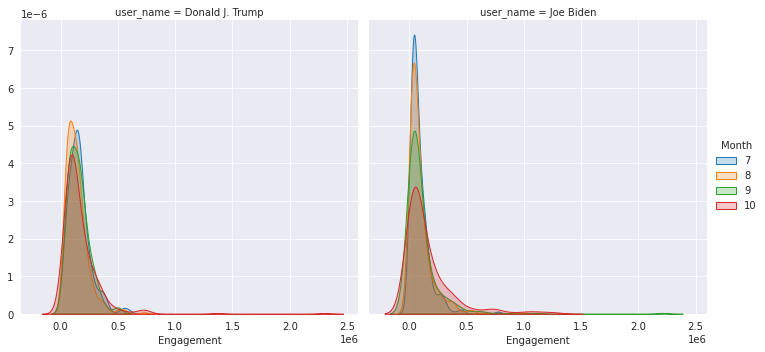

In [27]:
# Condition on unique values of the "Month" column.
g = sns.FacetGrid(data_Trump_Joe_2020, hue="Month", col='user_name', height=5)

# For each subset of values, generate a kernel density plot of the "Engagement" columns.
g.map(sns.kdeplot, "Engagement", shade=True)

sns.despine(left=True, bottom=True)

g.add_legend()
# Plot the graph
plt.show()

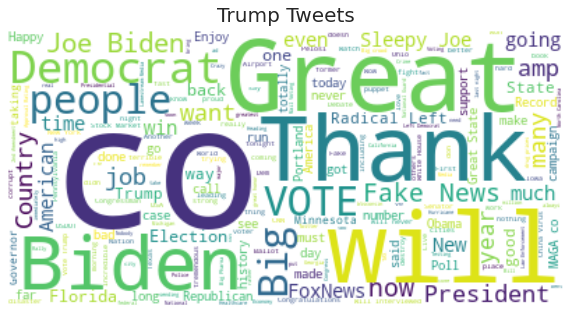

In [28]:
# Start with one tweet:
text = " ".join(tt for tt in data_Trump_Joe_2020[data_Trump_Joe_2020['user_name'] == 'Donald J. Trump'].tweet)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['https', 'zcdVQe2vRn'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.title('Trump Tweets', fontsize = 20, pad = 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Trump.png",dpi=300)
plt.show()

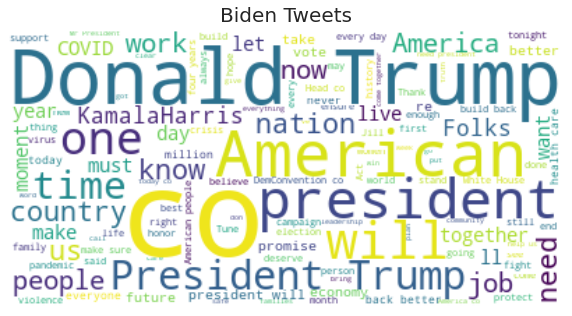

In [29]:
# Start with one tweet:
text = " ".join(tt for tt in data_Trump_Joe_2020[data_Trump_Joe_2020['user_name'] == 'Joe Biden'].tweet)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['https', 'zcdVQe2vRn'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.title('Biden Tweets', fontsize = 20, pad = 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Biden.png",dpi=300)
plt.show()